# Bitcoin - Team

In [42]:
#Declaring imports for importing modules

import pandas as pd
import numpy as np
from pprint import pprint
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import optimize
import tensorflow as tf
import math

from sklearn import cluster, mixture # For clustering 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [3]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/data/BITCOIN.csv'

/Users/ellise/Desktop/MLF


In [4]:
#Reading bitcoin history data into Dataframe
bitcoin_data = pd.read_csv(file_path, encoding='latin-1')

In [5]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,AveragePrice
0,27-Dec-13,763.28,777.51,713.6,735.07,46862700,"9,295,570,000",749.175
1,28-Dec-13,737.98,747.06,705.35,727.83,32505800,"8,990,850,000",732.905
2,29-Dec-13,728.05,748.61,714.44,745.05,19011300,"8,872,600,000",736.550
3,30-Dec-13,741.35,766.6,740.24,756.13,20707700,"9,037,000,000",748.740
4,31-Dec-13,760.32,760.58,738.17,754.01,20897300,"9,268,240,000",757.165


In [6]:
# It will replace ',' to nothing

bitcoin_data['Open'] = [x.replace(',', '') for x in bitcoin_data['Open']]
bitcoin_data['Close'] = [x.replace(',', '') for x in bitcoin_data['Close']]
bitcoin_data['High'] = [x.replace(',', '') for x in bitcoin_data['High']]
bitcoin_data['Low'] = [x.replace(',', '') for x in bitcoin_data['Low']]
bitcoin_data['Market Cap'] = [x.replace(',', '') for x in bitcoin_data['Market Cap']]

# It will convert columns to float

bitcoin_data['Open'] = bitcoin_data['Open'].astype(float)
bitcoin_data['Close'] = bitcoin_data['Close'].astype(float)
bitcoin_data['High'] = bitcoin_data['High'].astype(float)
bitcoin_data['Low'] = bitcoin_data['Low'].astype(float)
bitcoin_data['Market Cap'] = bitcoin_data['Market Cap'].astype(float)
bitcoin_data['Volume'] = bitcoin_data['Volume'].astype(float)

In [7]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,AveragePrice
0,27-Dec-13,763.28,777.51,713.60,735.07,46862700.0,9.295570e+09,749.175
1,28-Dec-13,737.98,747.06,705.35,727.83,32505800.0,8.990850e+09,732.905
2,29-Dec-13,728.05,748.61,714.44,745.05,19011300.0,8.872600e+09,736.550
3,30-Dec-13,741.35,766.60,740.24,756.13,20707700.0,9.037000e+09,748.740
4,31-Dec-13,760.32,760.58,738.17,754.01,20897300.0,9.268240e+09,757.165


In [8]:
#Checking for null values
bitcoin_data.isnull().any()

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Market Cap      False
AveragePrice    False
dtype: bool

In [8]:
bitcoin_data.describe(include='all')

,Date,Open,High,Low,Close,Volume,Market Cap,AveragePrice
count,1490,1490.000000,1490.000000,1490.000000,1490.000000,1.490000e+03,1.490000e+03,1490.000000
unique,1490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,27-Mar-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1532.797792,1590.437617,1472.480463,1539.762745,8.595825e+08,2.470860e+10,1536.280268
std,NaN,2962.330466,3108.313939,2788.592570,2972.843293,2.829126e+09,4.986451e+10,2965.276474
min,NaN,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.427830e+09,193.370000
25%,NaN,359.470000,366.867500,352.297500,359.270000,2.265438e+07,4.964632e+09,359.215000
50%,NaN,574.175000,580.755000,563.665000,574.135000,5.481315e+07,7.594825e+09,574.317500
75%,NaN,922.152500,942.052500,905.347500,921.932500,1.666762e+08,1.484262e+10,920.782500


In [9]:
bitcoin_data['Price'] = (bitcoin_data['Close'] + bitcoin_data['High'] + bitcoin_data['Low'])/3

In [10]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,AveragePrice,Price
0,27-Dec-13,763.28,777.51,713.60,735.07,46862700.0,9.295570e+09,749.175,742.060000
1,28-Dec-13,737.98,747.06,705.35,727.83,32505800.0,8.990850e+09,732.905,726.746667
2,29-Dec-13,728.05,748.61,714.44,745.05,19011300.0,8.872600e+09,736.550,736.033333
3,30-Dec-13,741.35,766.60,740.24,756.13,20707700.0,9.037000e+09,748.740,754.323333
4,31-Dec-13,760.32,760.58,738.17,754.01,20897300.0,9.268240e+09,757.165,750.920000


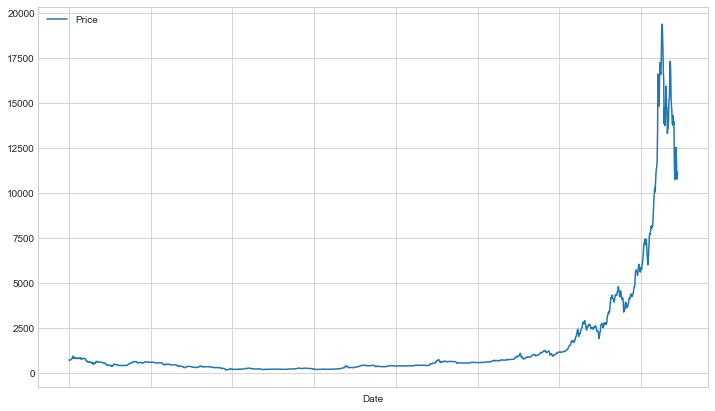

In [11]:
%matplotlib inline
bitcoin_data.plot(x='Date', y='Price', figsize=(12, 7))

In [12]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
newDF = bitcoin_data['Volume'].groupby(bitcoin_data.Date.dt.year).mean()

In [13]:
newDF

Date
2013    2.799696e+07
2014    2.509365e+07
2015    3.390557e+07
2016    8.592451e+07
2017    2.382867e+09
2018    1.491285e+10
Name: Volume, dtype: float64

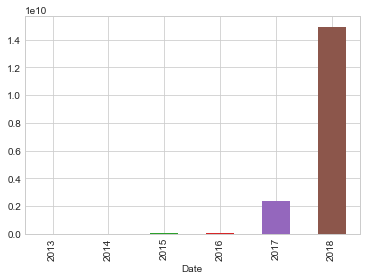

In [14]:
newDF.plot(kind='bar')

- utilize the skew() and kurt() methods for computing the unbiased skewness and kurtosis. In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew.

In [15]:
bitcoin_data.skew()

Open            3.702914
High            3.707148
Low             3.641977
Close           3.679500
Volume          4.914096
Market Cap      3.703188
AveragePrice    3.680054
Price           3.671433
dtype: float64

- The skew rather than 0,The representative waveform has a right long tail. 

In [16]:
bitcoin_data.kurt()

Open            14.297004
High            14.249756
Low             13.873291
Close           14.091844
Volume          25.714706
Market Cap      14.284139
AveragePrice    14.066556
Price           14.011417
dtype: float64

- The kurt rather than 3, it Indicates that the waveform is more flatness.

In [17]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [18]:
price = (bitcoin_data["Close"] + bitcoin_data["High"] + bitcoin_data["Low"])/3

In [19]:
mean = price.mean()
std = price.std()

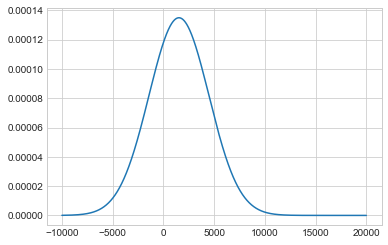

In [20]:
x = np.arange(-10000,20000,0.1)
y = normfun(x, mean, std) 
plt.plot(x,y)
plt.show()

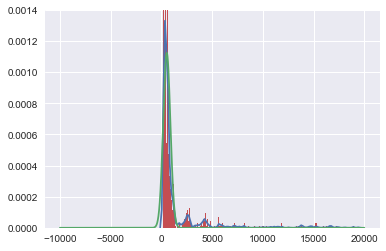

In [21]:
sns.set(color_codes=True)
ax = sns.kdeplot(price)
y = normfun(x, mean-1000, 0.12*std) 
plt.plot(x,y)
plt.hist(price, bins=400, rwidth=1, normed=True)
plt.show()

In [22]:
bitcoin_data.ix[bitcoin_data["Volume"].idxmax()]

Date            2018-01-05 00:00:00
Open                        15477.2
High                        17705.2
Low                         15202.8
Close                       17429.5
Volume                  2.38409e+10
Market Cap              2.59748e+11
AveragePrice                16453.3
Price                       16779.2
Name: 1470, dtype: object

In [23]:
bitcoin_data.ix[bitcoin_data["Volume"].idxmin()]

Date            2014-05-18 00:00:00
Open                          448.7
High                         449.77
Low                          444.78
Close                        446.26
Volume                  2.85783e+06
Market Cap               5.7354e+09
AveragePrice                 447.48
Price                       446.937
Name: 142, dtype: object

In [30]:
stock_file_path = cur_path + '/data/Stock_Values.csv'
print(stock_file_path)
stock_data = pd.read_csv(stock_file_path, encoding='latin-1')

/Users/palakagrawal/Desktop/Courses/MLF/data/Stock_Values.csv


In [31]:
stock_val = stock_data['Mkt-RF'][12283:]
stock_val = pd.DataFrame(stock_val).reset_index()
stock_val.head()
bitcoin_data['Mkt-RF'] = stock_val['Mkt-RF']
bitcoin_data['logVol'] = np.log(bitcoin_data['Volume'])
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,AveragePrice,Price,Mkt-RF,logVol
0,2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9.295570e+09,749.175,742.060000,-0.10,17.662733
1,2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8.990850e+09,732.905,726.746667,-0.99,17.296929
2,2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8.872600e+09,736.550,736.033333,0.82,16.760544
3,2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9.037000e+09,748.740,754.323333,0.74,16.846016
4,2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9.268240e+09,757.165,750.920000,0.05,16.855131


In [32]:
data = bitcoin_data[['Volume','Mkt-RF']].values

## Calculate **_Return_**
We use _Close Price_ as _**price**_ to get _**return**_ :
$return_t = \log(price_t - price_{t-1})$
* _**t**_ denotes time step

In [21]:
close_price = bitcoin_data['Close']
price_t = close_price[1:].reshape(-1,1)
price_t_back = close_price[0:-1].reshape(-1,1)
Rt = np.log(price_t/price_t_back)
Rt

array([[-0.00989823],
       [ 0.02338383],
       [ 0.01476199],
       ..., 
       [-0.05937434],
       [-0.00577989],
       [ 0.0441861 ]])

## Calculate OLS :
The OLS estimater is:
$$\hat{\beta}=(X`X)^{-1}X`Y$$

In [34]:
N = 2 + 1 # we only have 2 variables: Volume and Mkt_RF

def OLS(X,Y):
    """
    Ordinary least squares Linear Regression.
    Parameters
    ----------
    inputs : N x 2 vector, each column consists of observations from a random variable X1 or X2
    
    Return
    ----------
    bh : coefficiencies beta1, beta2, beta3 
    
    Notes
    -----
    this function takes X of 2 columns only.
    """
    
    nrow = X.shape[0]
    intercept = np.ones((nrow,1))
    predictor1 = X[:,0].reshape(-1,1)
    predictor2 = X[:,1].reshape(-1,1)
    
    X = np.concatenate((intercept, predictor1, predictor2), axis=1)
    
    ## Use the equation (X'X)^(-1)X'Y to calculate OLS coefficient estimates:
    bh = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    print('OLS coefficient estimates:       {}'.format(bh.T))
    
    ## check your work with Numpy's built in OLS function:
    z,resid,rank,sigma = np.linalg.lstsq(X,Y)
    print('check with build in OLS function:{}'.format(z.T))
    
    return bh.T

- Since for every day we use the close price of today substracts that of yesterday to get return for today, so acutually we calculate return from the second day up to end. For example, the first return is $return_2 = \log(preice_2 - preice_1)$, because we don't have $return_1$. (we don't have data for day 0)

In [35]:
bh = OLS(data[1:],Rt) # we use all data except first day； Y is return

OLS coefficient estimates:       [[  1.78665451e-03   5.97706423e-14  -1.59407997e-03]]
check with build in OLS function:[[  1.78665451e-03   5.97706423e-14  -1.59407997e-03]]


## Calculate T-test scores :  
The associated test statistic:  
$$t=\frac{\hat{\beta}}{\sigma(\hat{\beta})}$$
T-test result implies significance of the single tested variable.

### Covariance Matrix
Firstly, we need to calculate covariance matrix of $var(\hat{\beta}) = \begin{bmatrix}\sigma(\hat{\beta_0})^2 & cov(\hat{\beta_0},\hat{\beta_1}) & cov(\hat{\beta_0},\hat{\beta_2})\\cov(\hat{\beta_1},\hat{\beta_0}) & \sigma(\hat{\beta_1})^2 & cov(\hat{\beta_1},\hat{\beta_2})\\cov(\hat{\beta_2},\hat{\beta_0}) & cov(\hat{\beta_2},\hat{\beta_1}) & \sigma(\hat{\beta_2})^2\end{bmatrix}$  
Note that $cov(\hat{\beta_0},\hat{\beta_1})=cov(\hat{\beta_1},\hat{\beta_0})$，so here we get a **Symmetric Matrices**  
For multivariate regression, we use formula below to get $var(\hat{\beta})$ :
$$var(\hat{\beta})=(X`X)^{-1}X`var(\epsilon)X(X`X)^{-1}=var(\epsilon)(X`X)^{-1}$$  
where 
$$var(\epsilon)=\frac{1}{T-N}\sum_{t=1}^T\hat{\epsilon_t}^2$$  

* $var(\epsilon)=\frac{1}{T-N}\sum_{t=1}^T\hat{\epsilon_t}^2$

In [36]:
intercept = np.ones((data.shape[0],1))
volume = data[:,0].reshape(-1,1)
mkt_rf = data[:,1].reshape(-1,1)
variables_matrix = np.concatenate((intercept, volume, mkt_rf), axis=1)

- concatenate **volume** and **mkt_rf** as variables in cloumn2 and column3 respectively. fill up '1' in the first column 

In [37]:
variables_matrix = variables_matrix[1:] # count from the second day data to match return
print(variables_matrix)
print("The shape of matrix: {}".format(variables_matrix.shape))

[[  1.00000000e+00   3.25058000e+07  -9.90000000e-01]
 [  1.00000000e+00   1.90113000e+07   8.20000000e-01]
 [  1.00000000e+00   2.07077000e+07   7.40000000e-01]
 ..., 
 [  1.00000000e+00   1.05374000e+10   1.40000000e-01]
 [  1.00000000e+00   9.66061000e+09   6.30000000e-01]
 [  1.00000000e+00   9.94099000e+09  -4.10000000e-01]]
The shape of matrix: (1489, 3)


In [38]:
predictions = np.dot(variables_matrix,bh.T) # calculate predictions using coefficiencies (bh)
epsilon_hat_square_sum = sum((Rt-predictions)**2) # calculate sum of square errors
var_epsilon = (epsilon_hat_square_sum/(variables_matrix.shape[0]-variables_matrix.shape[1]))[0]
print(var_epsilon)

0.00155160611563


* $var(\hat{\beta})=var(\epsilon)(X`X)^{-1}$

In [39]:
X = variables_matrix

var_beta_hat = np.mat(np.dot(X.T,X)).I*var_epsilon
print(var_beta_hat)

[[  1.13837119e-06  -1.11988893e-16   1.53783793e-09]
 [ -1.11988893e-16   1.30199662e-25  -1.17162661e-18]
 [  1.53783793e-09  -1.17162661e-18   1.31550338e-06]]


In [40]:
np.mat(np.dot(X.T,X))

matrix([[  1.48900000e+03,   1.28073111e+12,  -6.00000000e-01],
        [  1.28073111e+12,   1.30188172e+22,   1.00977587e+10],
        [ -6.00000000e-01,   1.00977587e+10,   1.17948680e+03]])

### Now, we plug in $var(\hat{\beta})$ :

- The main diagnal elements in $var(\hat{\beta})$ are squared variances for each $\beta$

In [42]:
t_beta0 = bh[0][0]/math.sqrt(np.array(var_beta_hat[0])[0][0])
t_beta1 = bh[0][1]/math.sqrt(np.array(var_beta_hat[1])[0][1])
t_beta2 = bh[0][2]/math.sqrt(np.array(var_beta_hat[2])[0][2])
print('T test for beta_0: %.4f ; t for beta_1: %.4f ; t for beta_3: %.4f.'%(t_beta0,t_beta1,t_beta2))

T test for beta_0: 1.6746 ; t for beta_1: 0.1656 ; t for beta_3: -1.3898.


## Calculate R<sup>2</sup> :
$$R^2 = 1-\frac{SSE}{SST} = 1-\frac{\sum_{t=1}^T{(Y_i-\hat{Y}_i)^2}}{\sum_{t=1}^T(Y_i-\bar{Y})^2}$$

- We have alreald calculated SSE before, which was $\sum_{t=1}^T{\hat{\epsilon}}^2$  

In [43]:
SSE = epsilon_hat_square_sum[0]
print(SSE)

2.30568668782


In [44]:
SST = ((Rt - Rt.mean())**2).sum()
print(SST)

2.30872442252


In [45]:
R2 = 1 - SSE/SST
print(R2)

0.00131576322741


- Compare with build in sklearn function:

In [46]:
regr = linear_model.LinearRegression(normalize = True)
X = data[1:]
# Train the model using the training sets
regr.fit(X, Rt)
y_hat = regr.predict(X)
r2 = r2_score(Rt, y_hat)
print('Our R2 score: %.8f ; build in R2 score: %.8f'%(R2,r2))

Our R2 score: 0.00131576 ; build in R2 score: 0.00131576


## Calculate F test score:
F-test equation is below:
$$F = \frac{{R^2}/(N-1)}{(1-R^2)/(T-N)}$$
* N-1 is the number of variables (in our example, N = 3)
* T is the number of total observations
* in here $R^2$ is **NOT** $R$ with power 2; instead it is R squared score as we will calculate latter

In [47]:
F_r2 = (R2/(N-1))/((1-R2**2)/(Rt.size-N))
print(F_r2)

0.977613770441


- An alternative is below: 
$$F = \frac{MSM}{MSE} = \frac{{\hat{\beta}_m}`V_m(\hat{\beta})^{-1}\hat{\beta}_m/m}{SSE/(T-N)}$$
notice that MSM is acutally :
$$MSM = \frac{\sum{(\hat{Y}_i-\bar{Y})^2}}{N-1}$$
while $MSE = SSE/(T-N)$

- And  $MSE$ is actually the same to $var(\epsilon)$ which we have calculated previously. 
- We will use it directly.

In [49]:
MSE = var_epsilon
print(MSE)

0.00155160611563


In [50]:
MSM = (sum((predictions - Rt.mean())**2) / (N-1))[0]
print(MSM)

0.00151886734868


In [51]:
F = MSM/MSE
print(F) # this is different from F_r2, probably because of approximation problem

0.97890007869


In [53]:
tt = var_beta_hat[1:,1:]

In [54]:
th = bh[0][1:].reshape(1,-1)

In [55]:
th*tt.I*th.T/2

matrix([[ 0.97890008]])

In [56]:
MSM = th*tt.I*th.T/2
MSE = var_epsilon
F = MSM / MSE
F = np.array(F)[0][0] # extract scalar value from matrix format
print(F) # this value is too much away from F values above

630.894702484


- If we use var_beta_hat of $\hat{\beta}_1$ and $\hat{\beta}_2$:   $\begin{bmatrix}\hat{\beta}_1 & \hat{\beta}_2\end{bmatrix}\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}\begin{bmatrix}\hat{\beta}_1 \\ \hat{\beta}_2\end{bmatrix}$  
We directly get the same result of F score. So $V_m(\hat{\beta})$ must not be $\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}$, otherwise we need to divided by MSE.  
One possibility is that $V_m(\hat{\beta}) = var(\epsilon)*\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}$ if "two inverse matrix equal => these two matrix are equal" holds, which I'm not sure.

## Kalman Filter
- The Kalman Filter allows inference to be done in the basic state space model.
- Kalman filters are ideal for systems which are continuously changing. 
- They have the advantage that they are light on memory (they don’t need to keep any history other than the previous state), and they are very fast, making them well suited for real time problems and embedded systems.

In [9]:
def KalmanFilter(R,k,params):
    S_length = R.shape[0]
    S = S_length+1
    if k == 1:
        Z = np.array(2/(1+np.exp(-params[0]))-1)
        H = np.array(np.exp(params[1]))
        T = np.array(2/(1+np.exp(-params[2]))-1)
        Q = np.array(np.exp(params[3]))
    if k == 2:
        Z = np.array([[2/(1+np.exp(-params[0]))-1,2/(1+np.exp(-params[1]))-1]])
        H = np.array(np.exp(params[2]))
        T = np.array([[2/(1+np.exp(-params[3]))-1,0],[0,2/(1+np.exp(-params[4]))-1]])
        Q = np.array([[np.exp(params[5]),0],[0,np.exp(params[6])]])
    u_predict = np.zeros((k,S));
    u_update = np.zeros((k,S));
    P_predict = np.zeros((k,k,S));
    P_update = np.zeros((k,k,S));
    v = np.zeros((1,S));
    F = np.zeros((1,S));
    KF_Dens = np.zeros((1,S));
    for i in xrange(S):
        if i == 0:
            P_update[:,:,i] = 1000*np.eye(k)
            P_predict[:,:,i] = T.dot(np.array(P_update[0][0][0]).dot(T.T))+Q
        else:
            F[0][i] = Z.dot(P_predict[:,:,i-1].dot(Z.T))+H
            v[0][i] = R.T.flatten()[i-1]-Z.dot(u_predict[:,i-1])
            u_update[:,i] = u_predict[:,i-1]+P_predict[:,:,i-1].dot(Z.T.dot(np.linalg.inv([[F[0][i]]]).dot(v[0][i]))).flatten()
            u_predict[:,i] = T.dot(u_update[:,i])
            P_update[:,:,i] = P_predict[:,:,i-1]-P_predict[:,:,i-1].dot(Z.T.dot(np.linalg.inv([[F[0][i]]]).dot(Z.dot(P_predict[:,:,i-1]))))
            P_predict[:,:,i] = T.dot(P_update[:,:,i]).dot(T.T)+Q
            KF_Dens[0][i] = (1.0/2)*np.log(2*np.pi)+(1.0/2)*np.log(np.abs(F[0][i]))+(1.0/2)+v[0][i].T*np.linalg.inv([[F[0][i]]])*v[0][i]
    Likelihood = np.sum(KF_Dens)-KF_Dens[0][0]
    varargout = [u_update, P_update, P_predict, T]
    return Likelihood, varargout

In [10]:
def KalmanSmoother(R,k,params_star):
    _,vararg = KalmanFilter(R,k,params_star)
    u_update = vararg[0]
    P_update = vararg[1]
    P_predict = vararg[2]
    T = np.array(vararg[3])
    S = R.shape[0]+1
    u_smooth = np.zeros((k,S))
    P_smooth = np.zeros((k,k,S))
    u_smooth[:,S-1] = u_update[:,S-1]
    P_smooth[:,:,S-1] = P_update[:,:,S-1]    
    for t in reversed(xrange(1,S)): # 2 to S inverse sequence
        u_smooth[:,t-1] = u_update[:,t] + P_update[:,:,t].dot(T.T.dot(np.linalg.inv(P_predict[:,:,t]).dot((u_smooth[:,t]-T.dot(u_update[:,t])))))
        P_smooth[:,:,t-1] = P_update[:,:,t] + P_update[:,:,t].dot(T.T).dot(np.linalg.inv(P_predict[:,:,t])).dot((P_smooth[:,:,t]-P_predict[:,:,t])).dot(np.linalg.inv(P_predict[:,:,t])).dot(T).dot(P_update[:,:,t])
    u_smooth = u_smooth.flatten()[1:]
    return u_smooth

In [26]:
def KalmanFilter_main(R,k):
    r = 0.25*np.log(np.var(R,axis = 0,ddof=1))
    if k == 1:
        param0 = np.append(np.append(np.append(np.array(100),r,),100),r)
        
    if k == 2:
        param0 = np.append(np.append(np.append(np.array([100,100]),4*r),[-100,-100]),[r,r])
    def objective(params):
        Likelihood,_ = KalmanFilter(R,k,params)
        return Likelihood
    params_star= optimize.fmin(objective,param0)
    u_smooth = KalmanSmoother(R, k, params_star)
    Z = 2/(1+np.exp(-params_star[0]))-1;
    H = np.exp(params_star[1]);
    T = 2/(1+np.exp(-params_star[2]))-1;
    Q = np.exp(params_star[3]);
      
    u_tplus1 = T*u_smooth[-1] + np.random.normal()*np.sqrt(Q)
    price_tplus1 = Z*u_tplus1 + np.random.normal()*np.sqrt(H)
    print('T*u_smooth[-1] is {}; Z*u_tplus1 is {}'.format(T*u_smooth[-1],Z*u_tplus1))
    return price_tplus1,u_tplus1,u_smooth

In [12]:
R = bitcoin_data.drop(['Volume','Date'],axis = 1).values # just feed in all data
k = 1
R = R[:,0]
a,b,c, param = KalmanFilter_main(R,1)

Optimization terminated successfully.
         Current function value: 11501.093567
         Iterations: 207
         Function evaluations: 421
T*u_smooth[-1] is -10903.4; Z*u_tplus1 is 10864.9834665


In [13]:
params = param 
Z = np.array(2/(1+np.exp(-params[0]))-1)
H = np.array(np.exp(params[1]))
T = np.array(2/(1+np.exp(-params[2]))-1)
Q = np.array(np.exp(params[3]))
print(Z,T,H,Q)

(array(-1.0), array(1.0), array(4.860916762401386e-10), array(109072.47281047834))


In [ ]:
params = param 
Z = np.array([[2/(1+np.exp(-params[0]))-1,2/(1+np.exp(-params[1]))-1]])
H = np.array(np.exp(params[2]))
T = np.array([[2/(1+np.exp(-params[3]))-1,0],[0,2/(1+np.exp(-params[4]))-1]])
Q = np.array([[np.exp(params[5]),0],[0,np.exp(params[6])]])
print(Z,T,H,Q)

In [27]:
a,b,c=KalmanFilter_main(R,1)

Optimization terminated successfully.
         Current function value: 11501.093567
         Iterations: 207
         Function evaluations: 421
T*u_smooth[-1] is -10903.4; Z*u_tplus1 is 10682.2057501


In [29]:
a,b,c

(10682.205745873598,
 -10682.205750141648,
 array([  -737.98,   -728.05,   -741.35, ..., -10944.5 , -10903.4 , -10903.4 ]))

In [30]:
x = [i for i in xrange(1490)]

green line is smoothed line and red line is for close prices


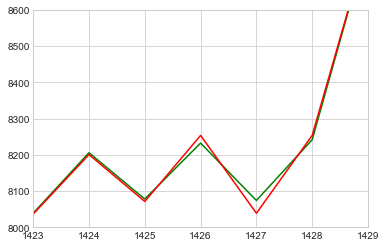

In [31]:
plt.plot(x,-c,color = 'g')
plt.plot(x,close_price,color = 'r')
plt.xlim(1423,1429)
plt.ylim(8000,8600)
print('green line is smoothed line and red line is for close prices')

- After we passed our data through KalmanFilter(green), the peak became lower and valley became higher both approaching each other, which means that the data had been smoothed.

In [32]:
next_price_pred_ = a
print('This is the prediction given by our Filter for t+1 price: {}'.format(next_price_pred_))

This is the prediction given by our Filter for t+1 price: 10682.2057459


- Then we compared some results from same code in matlab and in python. 
- We chose to compare 'u_smooth' because if every number in the array matches, then we would believe that two results are equal. 
- Not only because it's hard to guess every number in the array right, but also because for other two outputs, they would change everytime

### When k = 1:

In [33]:
_,_,smoothed_test1 = KalmanFilter_main(np.array([1,2,3,4]),1)
print(smoothed_test1)

T*u_smooth[-1] is 1330.10121781; Z*u_tplus1 is 2.99359743136
[  665.05060994   997.5759149   1330.10121781  1330.10121781]


In [34]:
_,_,smoothed_test2 = KalmanFilter_main(np.array([[1,2],[3,4],[5,6]]),1)
print(smoothed_test2)

T*u_smooth[-1] is 0.205757924703; Z*u_tplus1 is -5.62442045177
[ 3.  5.  5.]


\[  665.05060994,   997.5759149,   1330.10121781,  1330.10121781\] and \[ 3.,  5.,  5.\] are what we get from KalmanFilter in matlab version(refer to test pictures)  
- So if the matlab KalmanFilter was correctly coded(at least it worked well on my laptop..), then I have strong confidence that our python version is good. 
- I have also tried many other matrix of different shapes as inputs testing the functions and every time they were good.

### When k = 2

In [35]:
_,_,smoothed_test3 = a,b,c=KalmanFilter_main(np.array([1,2,3,4]),2)
print(smoothed_test3)

Optimization terminated successfully.
         Current function value: 11.429971
         Iterations: 614
         Function evaluations: 1024
T*u_smooth[-1] is -12.1094176827; Z*u_tplus1 is 2.44667413449e-05
[  1.12576292e-03  -1.12725820e-03   1.12841636e-03  -1.13041204e-03
  -2.13249142e+01  -2.14203362e+01  -2.15310946e+01  -2.16098437e+01
  -2.16090717e+01]


- When k = 2, things are quite different. 
- Because T, Z, and Q become vector or matrix instead of scalar. 
- We not only compared smoothed output, but also compared the term $T*u\_smooth[-1]$ which has none randomness, and term $Z*u\_tplus1$, which is very small due to smallness of Z (about $-10^6$). 
- We found that both terms are same to those given by matlab version.

- We didn't do more test on our program due to data access probelm in matlab. According to what we have done, we can tell:  
* If what we coded in matlab was 100% correct, then our python version is good for k = 1, k = 2 and any shape of R.
* Our code has obvious effect regarding to filtering and smoothing functionalities.
* Problem could occure if matrix multiplication failed in some situation. This is complicated to tell and we don't have time to thoroughly test everything. 

## Bollinger Band

### Bollinger Bands are calculated as follows:

    Middle Band = 20 day moving average

    Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 

    Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)

In [62]:
demo_bc = pd.DataFrame()
demo_bc['Date']=bitcoin_data['Date']
demo_bc['Open']=bitcoin_data['Open']
demo_bc['High']=bitcoin_data['High']
demo_bc['Low']=bitcoin_data['Low']
demo_bc['Close']=bitcoin_data['Close']
demo_bc['Volume']=bitcoin_data['Volume']
demo_bc.head()

,Date,Open,High,Low,Close,Volume
0,2013-12-27,763.28,777.51,713.60,735.07,46862700.0
1,2013-12-28,737.98,747.06,705.35,727.83,32505800.0
2,2013-12-29,728.05,748.61,714.44,745.05,19011300.0
3,2013-12-30,741.35,766.60,740.24,756.13,20707700.0
4,2013-12-31,760.32,760.58,738.17,754.01,20897300.0


In [63]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.index = bitcoin_data['Date']
del bitcoin_data['Date']

In [64]:
bitcoin_data.head()

,Open,High,Low,Close,Volume,Market Cap,AveragePrice,Price,Mkt-RF,logVol
Date,,,,,,,,,,
2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9.295570e+09,749.175,742.060000,-0.10,17.662733
2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8.990850e+09,732.905,726.746667,-0.99,17.296929
2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8.872600e+09,736.550,736.033333,0.82,16.760544
2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9.037000e+09,748.740,754.323333,0.74,16.846016
2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9.268240e+09,757.165,750.920000,0.05,16.855131


In [65]:
bitcoin_data['20 ma'] = pd.stats.moments.rolling_mean(bitcoin_data["Close"],5)

In [66]:
bitcoin_data['20 sd'] = pd.stats.moments.rolling_std(bitcoin_data["Close"],5)

In [69]:
bitcoin_data['Upper Band'] = bitcoin_data['20 ma'] + (bitcoin_data['20 sd']*0.2)

In [70]:
bitcoin_data['Lower Band'] = bitcoin_data['20 ma'] - (bitcoin_data['20 sd']*0.2)

In [71]:
bitcoin_data.tail()

,Open,High,Low,Close,Volume,Market Cap,AveragePrice,Price,Mkt-RF,logVol,20 ma,20 sd,Lower Band,Upper Band
Date,,,,,,,,,,,,,,
2018-01-20,11656.2,13103.0,11656.2,12899.2,1.180170e+10,1.959790e+11,12277.70,12552.800000,0.63,23.191509,11732.12,670.370634,11598.045873,11866.194127
2018-01-21,12889.2,12895.9,11288.2,11600.1,9.935180e+09,2.167400e+11,12244.65,11928.066667,1.24,23.019348,11754.04,662.237452,11621.592510,11886.487490
2018-01-22,11633.1,11966.4,10240.2,10931.4,1.053740e+10,1.956450e+11,11282.25,11046.000000,0.14,23.078197,11702.60,724.226757,11557.754649,11847.445351
2018-01-23,10944.5,11377.6,10129.7,10868.4,9.660610e+09,1.840870e+11,10906.45,10791.900000,0.63,22.991323,11581.30,816.775899,11417.944820,11744.655180
2018-01-24,10903.4,11501.4,10639.8,11359.4,9.940990e+09,1.834190e+11,11131.40,11166.866667,-0.41,23.019932,11531.70,822.306068,11367.238786,11696.161214


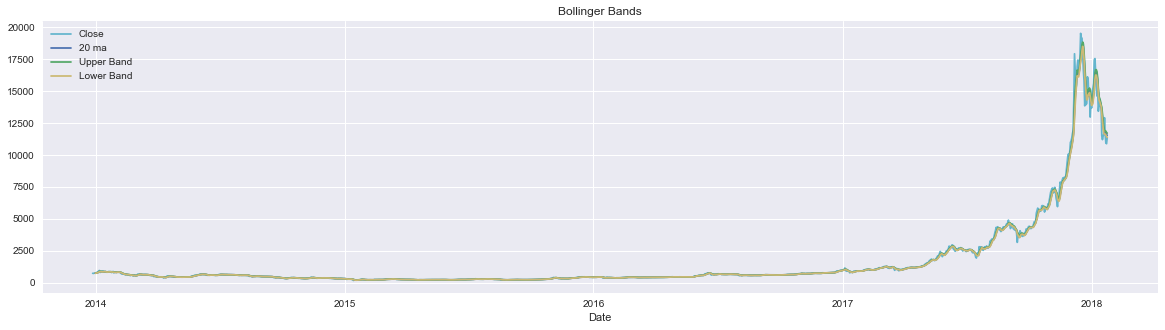

In [72]:
bitcoin_data.plot(y=['Close','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands', color='c''b''g''y',
                  figsize=(20, 5))

In [77]:
fixedData = bitcoin_data

In [78]:
bitcoin_data['Previous Open']=bitcoin_data['Open'].shift(1)
bitcoin_data['Previous Volume']=bitcoin_data['Volume'].shift(1)
bitcoin_data.fillna(0, inplace=True)
bitcoin_data.head(5)

,Open,High,Low,Close,Volume,Market Cap,AveragePrice,Price,Mkt-RF,logVol,20 ma,20 sd,Lower Band,Upper Band,Previous Open,Previous Volume
Date,,,,,,,,,,,,,,,,
2013-12-27,763.28,777.51,713.60,735.07,46862700.0,9.295570e+09,749.175,742.060000,-0.10,17.662733,0.000,0.000000,0.000000,0.000000,0.00,0.0
2013-12-28,737.98,747.06,705.35,727.83,32505800.0,8.990850e+09,732.905,726.746667,-0.99,17.296929,0.000,0.000000,0.000000,0.000000,763.28,46862700.0
2013-12-29,728.05,748.61,714.44,745.05,19011300.0,8.872600e+09,736.550,736.033333,0.82,16.760544,0.000,0.000000,0.000000,0.000000,737.98,32505800.0
2013-12-30,741.35,766.60,740.24,756.13,20707700.0,9.037000e+09,748.740,754.323333,0.74,16.846016,0.000,0.000000,0.000000,0.000000,728.05,19011300.0
2013-12-31,760.32,760.58,738.17,754.01,20897300.0,9.268240e+09,757.165,750.920000,0.05,16.855131,743.618,12.133875,741.191225,746.044775,741.35,20707700.0


In [79]:
predict = pd.DataFrame()
predict['Open']=fixedData['Open']
predict['Previous Open']=fixedData['Previous Open']
predict['Previous Volume']=fixedData['Previous Volume']
predict.head()

,Open,Previous Open,Previous Volume
Date,,,
2013-12-27,763.28,0.00,0.0
2013-12-28,737.98,763.28,46862700.0
2013-12-29,728.05,737.98,32505800.0
2013-12-30,741.35,728.05,19011300.0
2013-12-31,760.32,741.35,20707700.0


In [80]:
X = predict.ix[:,1:].values
y = predict.ix[:,0].values

In [81]:
y = y.reshape(len(X), 1)

In [87]:
beta_hat = np.dot(np.dot((np.linalg.inv(np.dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
beta_hat

array([[  1.00988986e+00],
       [ -1.05636576e-08]])

In [88]:
y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
y_hat
predict['RegressedOpen']=y_hat

In [89]:
residuals = y - y_hat #Residuals from OLS: Y - X*beta
residuals
predict['Residuals']=residuals

In [90]:
predict.head()

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals
Date,,,,,
2013-12-27,763.28,0.00,0.0,0.000000,763.280000
2013-12-28,737.98,763.28,46862700.0,770.333690,-32.353690
2013-12-29,728.05,737.98,32505800.0,744.935138,-16.885138
2013-12-30,741.35,728.05,19011300.0,735.049483,6.300517
2013-12-31,760.32,741.35,20707700.0,748.463098,11.856902


In [91]:
predict.tail()

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals
Date,,,,,
2018-01-20,11656.2,11429.8,1.074040e+10,11429.381203,226.818797
2018-01-21,12889.2,11656.2,1.180170e+10,11646.809057,1242.390943
2018-01-22,11633.1,12889.2,9.935180e+09,12911.720532,-1278.620532
2018-01-23,10944.5,11633.1,1.053740e+10,11636.836234,-692.336234
2018-01-24,10903.4,10944.5,9.660610e+09,10950.688186,-47.288186


In [92]:
r_squared = 1 - ((np.var(residuals))/np.var(y))
r_squared

0.99379624746814876

In [93]:
np.mean(residuals)

1.2407921186591078

In [94]:
short_rolling = predict.rolling(window=5).mean()
# Calculating the long-window simple moving average
long_rolling = predict.rolling(window=50).mean()
#fixedData['long_rolling'] = long_rolling
long_rolling.tail()

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals
Date,,,,,
2018-01-20,14898.778,14869.626,1.432738e+10,14865.334948,33.443052
2018-01-21,14936.996,14898.778,1.442775e+10,14893.714966,43.281034
2018-01-22,14948.004,14936.996,1.452369e+10,14931.297526,16.706474
2018-01-23,14940.586,14948.004,1.460227e+10,14941.584283,-0.998283
2018-01-24,14924.940,14940.586,1.467283e+10,14933.347506,-8.407506


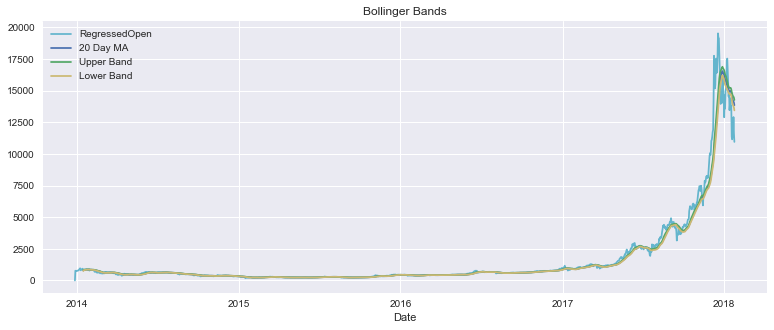

In [95]:
# Calculate 20 Day Moving Average, Std Deviation, Upper Band and Lower Band

predict['20 Day MA'] = predict['RegressedOpen'].rolling(window=20).mean()
predict['20 Day STD'] = predict['RegressedOpen'].rolling(window=20).std()
predict['Upper Band'] = predict['20 Day MA'] + (predict['20 Day STD'] * 0.2)
predict['Lower Band'] = predict['20 Day MA'] - (predict['20 Day STD'] * 0.2)

predict.plot(y=['RegressedOpen','20 Day MA', 'Upper Band', 'Lower Band'], title='Bollinger Bands', color='c''b''g''y',
                  figsize=(13, 5))

In [97]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

Text(0,0.5,'Price')

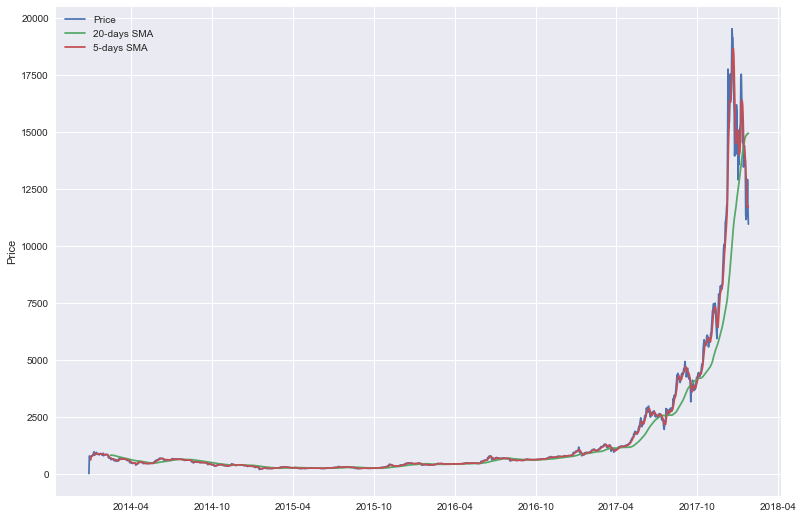

In [99]:
start_date = '2013-12-27'
end_date = '2018-01-24'
fig, ax = plt.subplots(figsize=(13,9))

ax.plot(predict.loc[start_date:end_date, :].index, predict.loc[start_date:end_date, 'RegressedOpen'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'RegressedOpen'], label = '20-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'RegressedOpen'], label = '5-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price')

In [100]:
predict.head(5)

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals,20 Day MA,20 Day STD,Upper Band,Lower Band
Date,,,,,,,,,
2013-12-27,763.28,0.00,0.0,0.000000,763.280000,NaN,NaN,NaN,NaN
2013-12-28,737.98,763.28,46862700.0,770.333690,-32.353690,NaN,NaN,NaN,NaN
2013-12-29,728.05,737.98,32505800.0,744.935138,-16.885138,NaN,NaN,NaN,NaN
2013-12-30,741.35,728.05,19011300.0,735.049483,6.300517,NaN,NaN,NaN,NaN
2013-12-31,760.32,741.35,20707700.0,748.463098,11.856902,NaN,NaN,NaN,NaN


In [126]:
from numpy import mean
X = predict['Open']
print(X[0:10])

Date
2013-12-27    763.28
2013-12-28    737.98
2013-12-29    728.05
2013-12-30    741.35
2013-12-31    760.32
2014-01-01    754.97
2014-01-02    773.44
2014-01-03    802.85
2014-01-04    823.27
2014-01-05    858.55
Name: Open, dtype: float64


In [127]:
def calclongshortBollinger(X, window):
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    averages = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        averages.append(yhat)
        history.append(obs)
    
    return averages

In [128]:
s_window = 5
l_window = 50

s_window_avg = calclongshortBollinger(X, s_window)
l_window_avg = calclongshortBollinger(X, l_window)

In [129]:
def calculatetradingsigBollinger():
    cross_over = [0] * len(l_window_avg)
    temp_signal = [0] * len(predict)
    signal = [0] * len(predict)
    BuyVal = []
    SellVal = []
    
    prev = -1
#     bought = False

    for i in range(len(l_window_avg)):
        cross_over[i] = l_window_avg[i] - s_window_avg[i]
        if i == 0:
            temp_signal[i] = 0
        else:
            # Buy
            if(cross_over[i] > 0):
                temp_signal[i] = 1
            #Sell
            if(cross_over[i] < 0):
                temp_signal[i] = -1
                
        ## Generate Signal
        if(i>2):
            if(temp_signal[i-3] == temp_signal[i-2] and temp_signal[i-2] == temp_signal[i-1]):
                if(temp_signal[i-1] == 1 and prev == -1):
                    signal[i] = 1
                    prev = 1
                    print('Buy Bitcoin at $ ',X[i-1])
                    BuyVal.append(X[i-1])
                    
                if(temp_signal[i-1] == -1 and prev == 1):
                    signal[i] = -1
                    prev = -1
                    print('Sell Bitcoin at $ ',X[i-1],'\n\n')
                    SellVal.append(X[i-1])
            
    return signal,BuyVal,SellVal

In [130]:
predict['TradingSignal'], BuyValBollinger , SellValBollinger = calculatetradingsigBollinger()

Buy Bitcoin at $  741.35
Sell Bitcoin at $  802.85 


Buy Bitcoin at $  436.44
Sell Bitcoin at $  529.07 


Buy Bitcoin at $  501.75
Sell Bitcoin at $  629.65 


Buy Bitcoin at $  585.7
Sell Bitcoin at $  602.62 


Buy Bitcoin at $  359.89
Sell Bitcoin at $  362.61 


Buy Bitcoin at $  358.61
Sell Bitcoin at $  365.86 


Buy Bitcoin at $  223.89
Sell Bitcoin at $  247.35 


Buy Bitcoin at $  233.35
Sell Bitcoin at $  260.36 


Buy Bitcoin at $  235.95
Sell Bitcoin at $  234.88 


Buy Bitcoin at $  237.64
Sell Bitcoin at $  270.83 


Buy Bitcoin at $  235.36
Sell Bitcoin at $  403.66 


Buy Bitcoin at $  384.28
Sell Bitcoin at $  452.34 


Buy Bitcoin at $  365.07
Sell Bitcoin at $  422.73 


Buy Bitcoin at $  421.84
Sell Bitcoin at $  704.5 


Buy Bitcoin at $  548.66
Sell Bitcoin at $  975.13 


Buy Bitcoin at $  908.18
Sell Bitcoin at $  1172.71 


Buy Bitcoin at $  1180.16
Sell Bitcoin at $  2512.4 


Buy Bitcoin at $  2607.25
Sell Bitcoin at $  4326.99 


Buy Bitcoin at $  4189.31


In [131]:
profit_loss_bollinger = [x2 - x1 for (x1, x2) in zip(BuyValBollinger, SellValBollinger)]

In [132]:
profit_loss_bollinger

[61.5,
 92.630000000000052,
 127.89999999999998,
 16.919999999999959,
 2.7200000000000273,
 7.25,
 23.460000000000008,
 27.010000000000019,
 -1.0699999999999932,
 33.189999999999998,
 168.30000000000001,
 68.060000000000002,
 57.660000000000025,
 282.66000000000003,
 426.47000000000003,
 264.53000000000009,
 1332.24,
 1719.7399999999998,
 143.50999999999931]

In [133]:
predict.head(20)

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals,20 Day MA,20 Day STD,Upper Band,Lower Band,TradingSignal
Date,,,,,,,,,,
2013-12-27,763.28,0.00,0.0,0.000000,763.280000,NaN,NaN,NaN,NaN,0
2013-12-28,737.98,763.28,46862700.0,770.333690,-32.353690,NaN,NaN,NaN,NaN,0
2013-12-29,728.05,737.98,32505800.0,744.935138,-16.885138,NaN,NaN,NaN,NaN,0
2013-12-30,741.35,728.05,19011300.0,735.049483,6.300517,NaN,NaN,NaN,NaN,0
2013-12-31,760.32,741.35,20707700.0,748.463098,11.856902,NaN,NaN,NaN,NaN,1
2014-01-01,754.97,760.32,20897300.0,767.618706,-12.648706,NaN,NaN,NaN,NaN,0
2014-01-02,773.44,754.97,22489400.0,762.198977,11.241023,NaN,NaN,NaN,NaN,0
2014-01-03,802.85,773.44,38489500.0,780.682623,22.167377,NaN,NaN,NaN,NaN,0
2014-01-04,823.27,802.85,37810100.0,810.390660,12.879340,NaN,NaN,NaN,NaN,-1


In [134]:
profit_bollinger = []
loss_bollinger = []
p = range(19)
for x in profit_loss_bollinger:
    if x > 0:
        profit_bollinger.append(x)
    else:
        profit_bollinger.append(0)

for y in profit_loss_bollinger:
    if y < 0:
        loss_bollinger.append(y)
    else:
        loss_bollinger.append(0)

In [135]:
profit_bollinger[0:3]

[61.5, 92.630000000000052, 127.89999999999998]

In [136]:
loss_bollinger[0:9]

[0, 0, 0, 0, 0, 0, 0, 0, -1.0699999999999932]

<Container object of 19 artists>

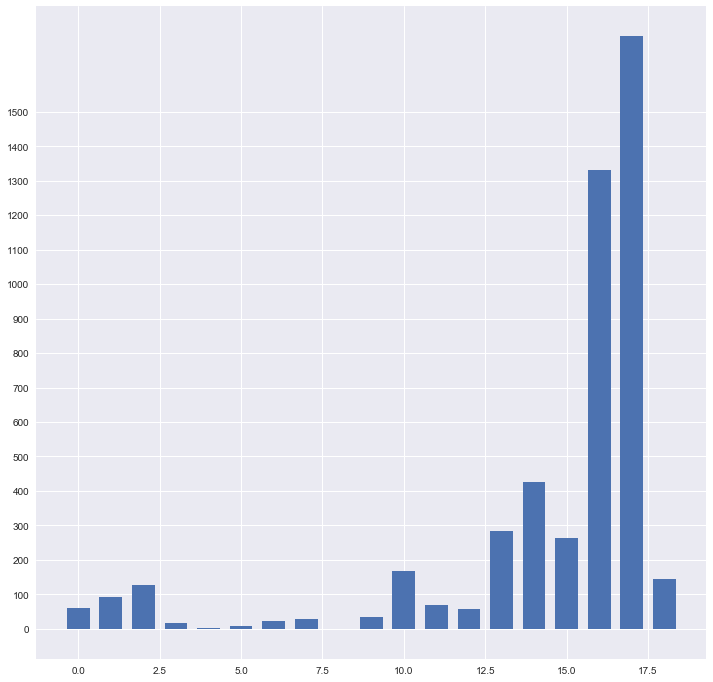

In [137]:
plt.figure(figsize=(12, 12))  # width:20, height:3
major_ticks = np.arange(0, 1600, 100)
ax = plt.subplot(111)
ax.set_yticks(major_ticks)
ax.bar(p, loss_bollinger, width=0.7, color='r')
ax.bar(p, profit_bollinger, width=0.7, color='b')

## Simple Moving Average

In [138]:
bitcoin_series = pd.read_csv(cur_path+'/data/BITCOIN_Series.csv', encoding='latin-1')

In [139]:
bitcoin_series.head()

,Date,AveragePrice
0,27-Dec-13,749.18
1,28-Dec-13,732.91
2,29-Dec-13,736.55
3,30-Dec-13,748.74
4,31-Dec-13,757.17


In [140]:
series = pd.Series.from_csv(cur_path + '/data/BITCOIN_Series.csv', header=0)
series = pd.Series(series)
X = series.values
window = 5
history_X = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high_X = list()
spread_low_X = list()
predictions_X = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history_X)
    yhat = np.mean([history_X[i] for i in range(length-window,length)])
    obs = test[t]
    predictions_X.append(yhat)
    history_X.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=744.910000, expected=763.190000
predicted=747.712000, expected=787.920000
predicted=758.714000, expected=810.790000
predicted=773.562000, expected=841.390000
predicted=792.092000, expected=896.040000
predicted=819.866000, expected=944.670000
predicted=856.162000, expected=874.250000
predicted=873.428000, expected=819.360000
predicted=875.142000, expected=844.170000
predicted=875.698000, expected=857.590000
predicted=868.008000, expected=890.640000
predicted=857.202000, expected=891.410000
predicted=860.634000, expected=850.700000
predicted=866.902000, expected=838.220000
predicted=865.712000, expected=847.010000
predicted=863.596000, expected=847.960000
predicted=855.060000, expected=824.570000
predicted=841.692000, expected=828.040000
predicted=837.160000, expected=855.310000
predicted=840.578000, expected=870.800000
predicted=845.336000, expected=866.780000
predicted=849.100000, expected=856.400000
predicted=855.466000, expected=833.750000
predicted=856.608000, expected=809

predicted=238.174000, expected=241.230000
predicted=239.816000, expected=241.630000
predicted=241.442000, expected=238.890000
predicted=241.114000, expected=236.570000
predicted=239.868000, expected=237.290000
predicted=239.122000, expected=236.900000
predicted=238.256000, expected=236.410000
predicted=237.212000, expected=235.010000
predicted=236.436000, expected=232.500000
predicted=235.622000, expected=232.960000
predicted=234.756000, expected=234.680000
predicted=234.312000, expected=237.840000
predicted=234.598000, expected=239.580000
predicted=235.512000, expected=239.970000
predicted=237.006000, expected=239.020000
predicted=238.218000, expected=237.110000
predicted=238.704000, expected=237.180000
predicted=238.572000, expected=237.340000
predicted=238.124000, expected=237.240000
predicted=237.578000, expected=235.220000
predicted=236.818000, expected=231.670000
predicted=235.730000, expected=226.580000
predicted=233.610000, expected=224.350000
predicted=231.012000, expected=225

In [141]:
window = 20
Y = series.values
history_Y = [Y[i] for i in range(window)]
test = [Y[i] for i in range(window, len(Y))]
spread_high_Y = list()
spread_low_Y = list()
predictions_Y = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history_Y)
    yhat = np.mean([history_Y[i] for i in range(length-window,length)])
    obs = test[t]
    predictions_Y.append(yhat)
    history_Y.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=824.095000, expected=847.960000
predicted=829.034000, expected=824.570000
predicted=833.617000, expected=828.040000
predicted=838.191500, expected=855.310000
predicted=843.520000, expected=870.800000
predicted=849.201500, expected=866.780000
predicted=854.381000, expected=856.400000
predicted=857.805000, expected=833.750000
predicted=858.953000, expected=809.750000
predicted=857.371000, expected=824.930000
predicted=853.815500, expected=869.480000
predicted=850.056000, expected=828.000000
predicted=847.743500, expected=793.270000
predicted=846.439000, expected=817.980000
predicted=845.129500, expected=822.530000
predicted=843.376500, expected=824.180000
predicted=840.053500, expected=830.600000
predicted=837.013000, expected=829.140000
predicted=835.935000, expected=823.960000
predicted=835.222000, expected=825.870000
predicted=834.165000, expected=820.940000
predicted=832.814000, expected=798.570000
predicted=831.514000, expected=747.800000
predicted=827.502000, expected=686

predicted=242.162000, expected=223.110000
predicted=240.931000, expected=223.030000
predicted=239.822000, expected=223.620000
predicted=238.711000, expected=229.950000
predicted=237.921000, expected=234.890000
predicted=237.163000, expected=235.260000
predicted=236.241000, expected=233.620000
predicted=235.222000, expected=228.820000
predicted=233.804000, expected=222.920000
predicted=232.044500, expected=224.360000
predicted=230.551000, expected=227.420000
predicted=229.470000, expected=225.700000
predicted=228.544000, expected=230.920000
predicted=228.096000, expected=234.010000
predicted=227.982000, expected=233.640000
predicted=227.846500, expected=237.620000
predicted=228.214000, expected=239.690000
predicted=229.100500, expected=237.490000
predicted=229.902500, expected=233.020000
predicted=230.241000, expected=233.500000
predicted=230.629500, expected=240.530000
predicted=231.500500, expected=242.800000
predicted=232.489000, expected=241.020000
predicted=233.359000, expected=241

predicted=412.189000, expected=435.570000
predicted=415.231000, expected=436.520000
predicted=418.112000, expected=429.560000
predicted=420.546000, expected=422.780000
predicted=422.586000, expected=416.390000
predicted=423.993000, expected=405.680000
predicted=424.273000, expected=404.120000
predicted=424.285000, expected=411.040000
predicted=424.614000, expected=414.220000
predicted=424.725500, expected=414.380000
predicted=424.471000, expected=415.940000
predicted=424.180000, expected=419.470000
predicted=423.684500, expected=416.620000
predicted=422.601000, expected=412.860000
predicted=421.325500, expected=415.320000
predicted=420.616500, expected=416.610000
predicted=420.299000, expected=416.950000
predicted=419.907000, expected=419.260000
predicted=419.450500, expected=415.050000
predicted=418.569000, expected=409.860000
predicted=417.410000, expected=412.080000
predicted=416.235500, expected=413.370000
predicted=415.078000, expected=415.610000
predicted=414.380500, expected=418

In [142]:
len(bitcoin_series['AveragePrice'])

1490

In [143]:
moving_low_high = pd.DataFrame(columns=['AveragePrice','5_Day','20_Day'])

In [144]:
moving_low_high['AveragePrice'] = bitcoin_series['AveragePrice'][0:1469]
moving_low_high['5_Day'] = predictions_X[0:1469]
moving_low_high['20_Day'] = predictions_Y[0:1469]

In [145]:
moving_low_high.head()

,AveragePrice,5_Day,20_Day
0,749.18,744.910,824.0950
1,732.91,747.712,829.0340
2,736.55,758.714,833.6170
3,748.74,773.562,838.1915
4,757.17,792.092,843.5200


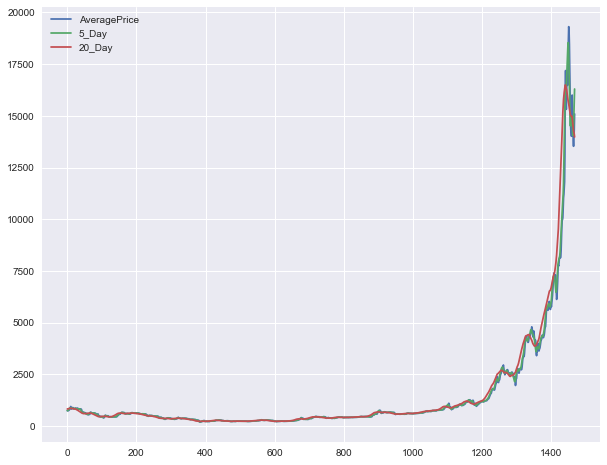

In [146]:
moving_low_high.plot(grid=True,figsize=(10,8))

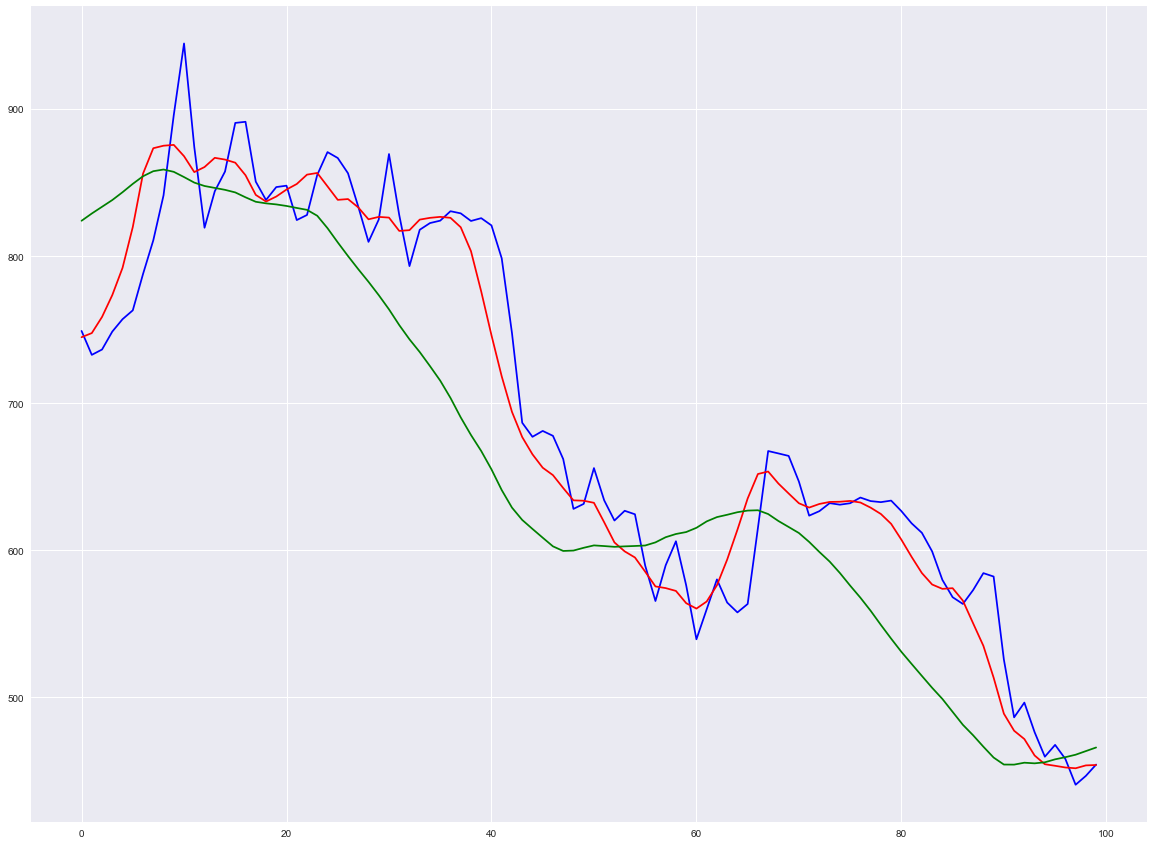

In [147]:
plt.plot(moving_low_high['AveragePrice'][0:100], color='blue')
plt.plot(moving_low_high['5_Day'][0:100], color = 'red')
plt.plot(moving_low_high['20_Day'][0:100], color = 'green')
plt.show()

In [148]:
moving_low_high['5-20_Day'] = moving_low_high['5_Day'] - moving_low_high['20_Day']

- We will have 3 basic states/rules:
    
    1) Buy Signal (go long) – the 5 day moving average is for the first time X points above the 20 day trend.
    
    2) Hold – no position.
    
    3) Sell Signal (go short) – the 5 day moving average is for the first time X points below the 20 day trend.

In [149]:
moving_low_high.head()

,AveragePrice,5_Day,20_Day,5-20_Day
0,749.18,744.910,824.0950,-79.1850
1,732.91,747.712,829.0340,-81.3220
2,736.55,758.714,833.6170,-74.9030
3,748.74,773.562,838.1915,-64.6295
4,757.17,792.092,843.5200,-51.4280


In [150]:
# crossing_value = 78
# moving_low_high['Signal'] = np.where(moving_low_high['5-20_Day'] > crossing_value, 1, 0)
# moving_low_high['Signal'] = np.where(moving_low_high['5-20_Day'] < crossing_value, -1, moving_low_high['Signal'])
# moving_low_high['Signal'].value_counts()

In [151]:
# moving_low_high['Signal'].plot(lw=1.5,ylim=[-1.1,1.1],figsize = (12,5))

In [152]:
moving_low_high['Signal'] = np.where(moving_low_high['AveragePrice'] < moving_low_high['5_Day'] , 1, -1)
moving_low_high['Signal'] = np.where(moving_low_high['AveragePrice'] == moving_low_high['5_Day'], 0,moving_low_high['Signal'])
moving_low_high['Signal'].value_counts()

 1    838
-1    631
Name: Signal, dtype: int64

In [153]:
moving_low_high['Buy/Sell_5Day'] = np.where(moving_low_high['AveragePrice'] < moving_low_high['5_Day'] , 'Buy', 'Sell')
moving_low_high['Buy/Sell_5Day'] = np.where(moving_low_high['AveragePrice'] == moving_low_high['5_Day'], 'None',moving_low_high['Buy/Sell_5Day'])
moving_low_high['Buy/Sell_5Day'].value_counts()

Buy     838
Sell    631
Name: Buy/Sell_5Day, dtype: int64

In [154]:
moving_low_high.head(10)

,AveragePrice,5_Day,20_Day,5-20_Day,Signal,Buy/Sell_5Day
0,749.18,744.910,824.0950,-79.1850,-1,Sell
1,732.91,747.712,829.0340,-81.3220,1,Buy
2,736.55,758.714,833.6170,-74.9030,1,Buy
3,748.74,773.562,838.1915,-64.6295,1,Buy
4,757.17,792.092,843.5200,-51.4280,1,Buy
5,763.19,819.866,849.2015,-29.3355,1,Buy
6,787.92,856.162,854.3810,1.7810,1,Buy
7,810.79,873.428,857.8050,15.6230,1,Buy
8,841.39,875.142,858.9530,16.1890,1,Buy
9,896.04,875.698,857.3710,18.3270,-1,Sell


- A long (or long position) is the buying of a security such as a stock, commodity or currency with the expectation that the asset will rise in value.
- With a long position investment, the investor purchases an asset and owns it with the expectation that the price is going to rise. 
- He normally has no plan to sell the security in the near future. A key component of long position investment is the ownership of the stock or bond. 
- This contrasts with the short position investment, where an investor does not own the stock but borrows it with the expectation of selling it and then repurchasing it at a lower price. 
- A key difference between a long position and a short position in investments is what the investor expects to happen to the price of a commodity.

- Market Returns
    - So in this model, our investor is either long the market, short the market or flat – this allows us to work with market returns and simply multiply the day’s market return by -1 if he is short, 1 if he is long and 0 if he is flat the previous day.
    - So we add yet another column to the DataFrame to hold the daily log returns of the index and then multiply that column by the ‘Signal’ column to get strategy returns:

In [155]:
moving_low_high['Market Returns'] = np.log(moving_low_high['AveragePrice'] / moving_low_high['AveragePrice'].shift(1))
moving_low_high['Strategy'] = moving_low_high['Market Returns'] * moving_low_high['Signal'].shift(1)

- Note how we have shifted the AveragePrice series down so that we are using the ‘Signal’ at the close of the previous day to calculate the return on the next day

- Now we can plot the returns of the Data versus the returns on the moving average crossover strategy on the same chart for comparison:

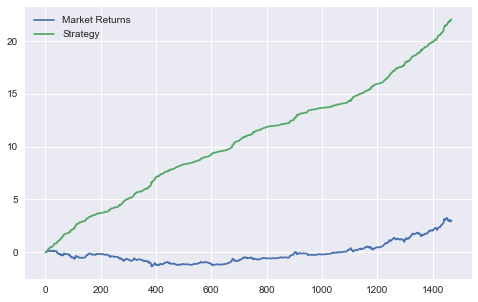

In [156]:
moving_low_high[['Market Returns','Strategy']].cumsum().plot(grid=True,figsize=(8,5))

In [157]:
from numpy import mean
X = moving_low_high['AveragePrice']
print(X[0:10])

0    749.18
1    732.91
2    736.55
3    748.74
4    757.17
5    763.19
6    787.92
7    810.79
8    841.39
9    896.04
Name: AveragePrice, dtype: float64


In [158]:
def calclongshort(X, window):
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    averages = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        averages.append(yhat)
        history.append(obs)
    
    return averages

In [159]:
s_window = 5
l_window = 50

s_window_avg = calclongshort(X, s_window)
l_window_avg = calclongshort(X, l_window)

In [160]:
l_window_avg

[803.54500000000019,
 801.67960000000005,
 799.70080000000019,
 797.37479999999994,
 794.93759999999997,
 792.28419999999994,
 788.81280000000015,
 784.36479999999995,
 779.94560000000001,
 775.24080000000004,
 768.84360000000015,
 760.73980000000006,
 754.45220000000018,
 749.66920000000016,
 744.07540000000006,
 738.07899999999995,
 731.53639999999996,
 726.01140000000009,
 722.34760000000006,
 718.9008,
 715.24440000000004,
 711.21980000000008,
 707.19960000000003,
 703.17160000000001,
 698.70659999999987,
 693.91120000000001,
 689.21580000000006,
 684.80539999999996,
 680.7998,
 677.25979999999993,
 673.43739999999991,
 668.58080000000007,
 664.38759999999991,
 660.76019999999994,
 656.38580000000002,
 651.5329999999999,
 646.41160000000002,
 641.07000000000005,
 635.94640000000004,
 631.15679999999998,
 626.2826,
 620.37879999999996,
 614.13560000000007,
 609.10839999999996,
 604.89979999999991,
 600.54920000000004,
 596.2793999999999,
 591.8854,
 587.45600000000002,
 583.82479999

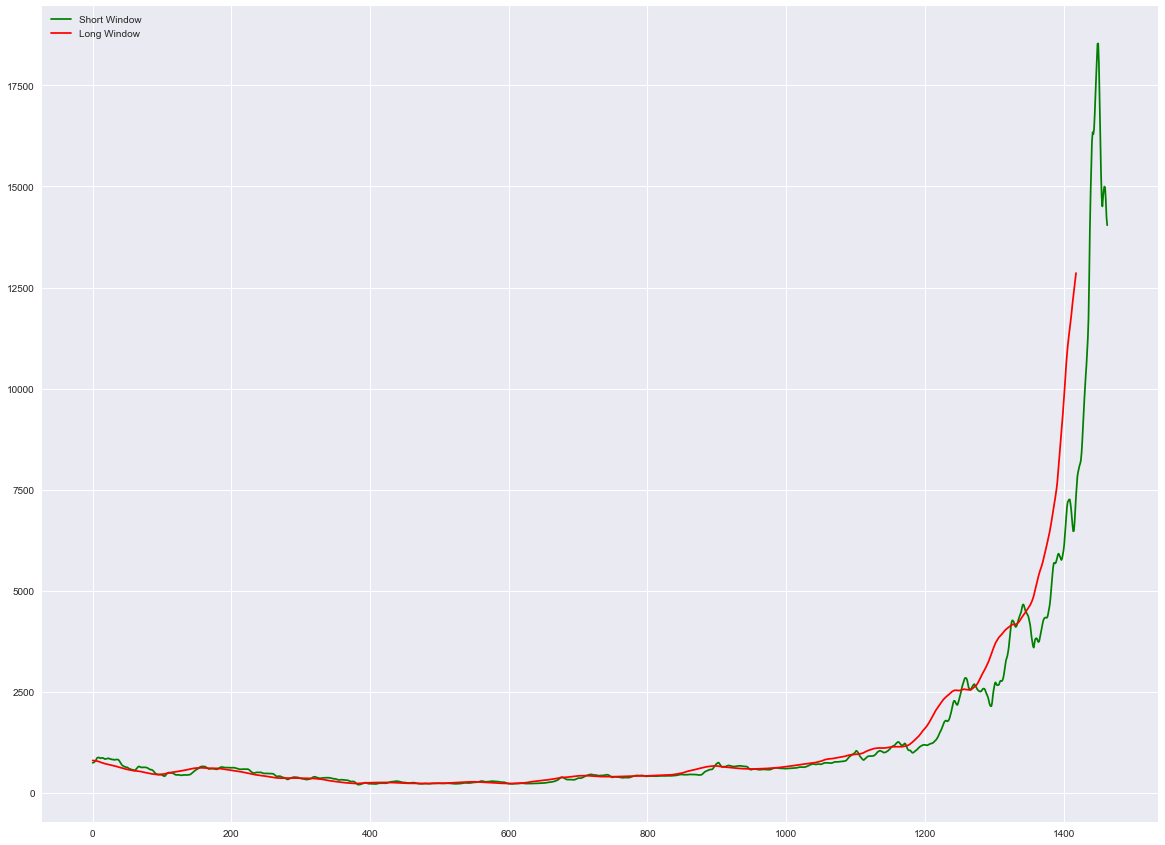

In [161]:
# pyplot.plot(X, label='Original')
plt.plot(s_window_avg, color='green', label='Short Window')
plt.plot(l_window_avg, color='red', label='Long Window')
plt.legend(loc=2)
plt.rcParams['figure.figsize'] = (20, 15)
plt.show()

In [162]:
def calculatetradingsig():
    cross_over = [0] * len(l_window_avg)
    temp_signal = [0] * len(moving_low_high)
    signal = [0] * len(moving_low_high)
    BuyVal = []
    SellVal = []
    
    prev = -1
#     bought = False

    for i in range(len(l_window_avg)):
        cross_over[i] = l_window_avg[i] - s_window_avg[i]
        if i == 0:
            temp_signal[i] = 0
        else:
            # Buy
            if(cross_over[i] > 0):
                temp_signal[i] = 1
            #Sell
            if(cross_over[i] < 0):
                temp_signal[i] = -1
                
        ## Generate Signal
        if(i>2):
            if(temp_signal[i-3] == temp_signal[i-2] and temp_signal[i-2] == temp_signal[i-1]):
                if(temp_signal[i-1] == 1 and prev == -1):
                    signal[i] = 1
                    prev = 1
                    print('Buy Bitcoin at $ ',X[i-1])
                    BuyVal.append(X[i-1])
                    
                if(temp_signal[i-1] == -1 and prev == 1):
                    signal[i] = -1
                    prev = -1
                    print('Sell Bitcoin at $ ',X[i-1],'\n\n')
                    SellVal.append(X[i-1])
            
    return signal,BuyVal,SellVal

In [163]:
moving_low_high['TradingSignal'], BuyVal , SellVal = calculatetradingsig()

Buy Bitcoin at $  748.74
Sell Bitcoin at $  810.79 


Buy Bitcoin at $  458.14
Sell Bitcoin at $  524.8 


Buy Bitcoin at $  490.58
Sell Bitcoin at $  626.96 


Buy Bitcoin at $  592.93
Sell Bitcoin at $  599.53 


Buy Bitcoin at $  367.35
Sell Bitcoin at $  361.83 


Buy Bitcoin at $  358.47
Sell Bitcoin at $  364.6 


Buy Bitcoin at $  201.0
Sell Bitcoin at $  250.54 


Buy Bitcoin at $  248.64
Sell Bitcoin at $  257.24 


Buy Bitcoin at $  236.35
Sell Bitcoin at $  233.64 


Buy Bitcoin at $  237.29
Sell Bitcoin at $  270.03 


Buy Bitcoin at $  231.13
Sell Bitcoin at $  407.61 


Buy Bitcoin at $  378.83
Sell Bitcoin at $  433.61 


Buy Bitcoin at $  376.31
Sell Bitcoin at $  421.76 


Buy Bitcoin at $  416.39
Sell Bitcoin at $  695.03 


Buy Bitcoin at $  557.51
Sell Bitcoin at $  974.32 


Buy Bitcoin at $  906.04
Sell Bitcoin at $  1173.2 


Buy Bitcoin at $  1140.2
Sell Bitcoin at $  2529.8 


Buy Bitcoin at $  2598.33
Sell Bitcoin at $  4254.46 


Buy Bitcoin at $  4138.49
Sel

In [164]:
profit_loss = [x2 - x1 for (x1, x2) in zip(BuyVal, SellVal)]

In [165]:
profit_loss

[62.049999999999955,
 66.659999999999968,
 136.38000000000005,
 6.6000000000000227,
 -5.5200000000000387,
 6.1299999999999955,
 49.539999999999992,
 8.6000000000000227,
 -2.710000000000008,
 32.739999999999981,
 176.48000000000002,
 54.78000000000003,
 45.449999999999989,
 278.63999999999999,
 416.81000000000006,
 267.16000000000008,
 1389.6000000000001,
 1656.1300000000001,
 97.650000000000546]

In [166]:
moving_low_high.head(15)

,AveragePrice,5_Day,20_Day,5-20_Day,Signal,Buy/Sell_5Day,Market Returns,Strategy,TradingSignal
0,749.18,744.910,824.0950,-79.1850,-1,Sell,NaN,NaN,0
1,732.91,747.712,829.0340,-81.3220,1,Buy,-0.021956,0.021956,0
2,736.55,758.714,833.6170,-74.9030,1,Buy,0.004954,0.004954,0
3,748.74,773.562,838.1915,-64.6295,1,Buy,0.016415,0.016415,0
4,757.17,792.092,843.5200,-51.4280,1,Buy,0.011196,0.011196,1
5,763.19,819.866,849.2015,-29.3355,1,Buy,0.007919,0.007919,0
6,787.92,856.162,854.3810,1.7810,1,Buy,0.031890,0.031890,0
7,810.79,873.428,857.8050,15.6230,1,Buy,0.028613,0.028613,0
8,841.39,875.142,858.9530,16.1890,1,Buy,0.037046,0.037046,-1
9,896.04,875.698,857.3710,18.3270,-1,Sell,0.062930,0.062930,0


In [167]:
profit = []
loss = []
p = range(19)
for x in profit_loss:
    if x > 0:
        profit.append(x)
    else:
        profit.append(0)

for y in profit_loss:
    if y < 0:
        loss.append(y)
    else:
        loss.append(0)
        
# # Make a fake dataset:
# height = profit_loss
# bars = profit_loss
# y_pos = np.arange(len(bars))
 


In [168]:
profit

[62.049999999999955,
 66.659999999999968,
 136.38000000000005,
 6.6000000000000227,
 0,
 6.1299999999999955,
 49.539999999999992,
 8.6000000000000227,
 0,
 32.739999999999981,
 176.48000000000002,
 54.78000000000003,
 45.449999999999989,
 278.63999999999999,
 416.81000000000006,
 267.16000000000008,
 1389.6000000000001,
 1656.1300000000001,
 97.650000000000546]

In [169]:
loss

[0,
 0,
 0,
 0,
 -5.5200000000000387,
 0,
 0,
 0,
 -2.710000000000008,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

<Container object of 19 artists>

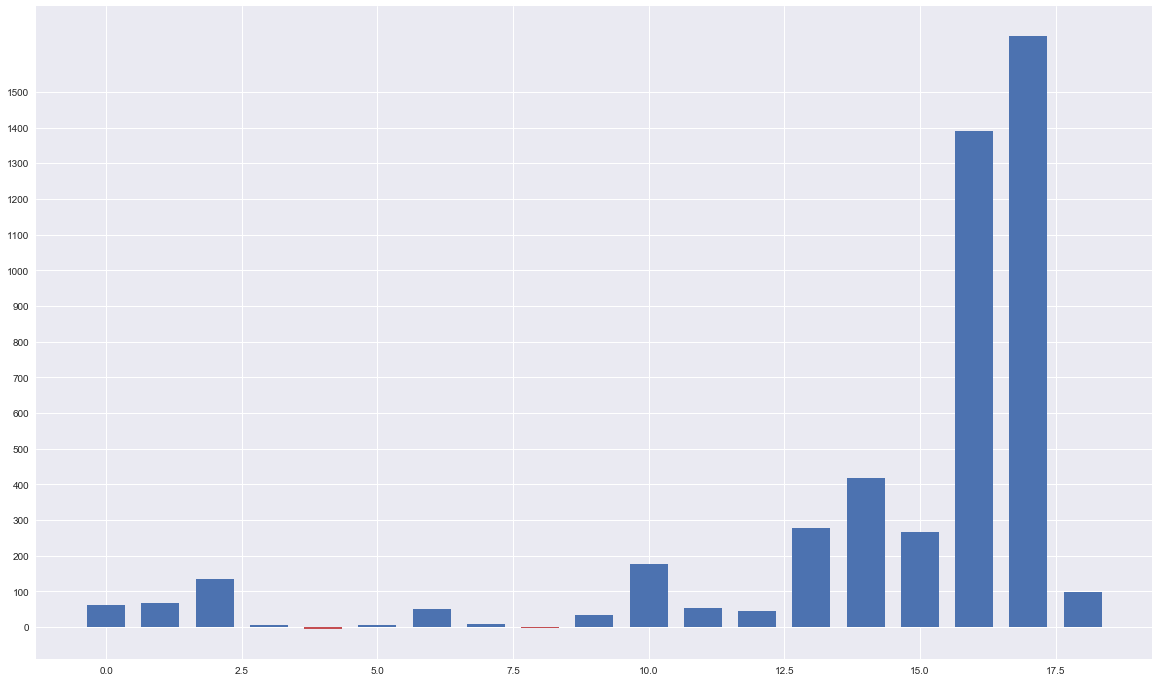

In [170]:
# Create bars
plt.figure(figsize=(20, 12))  # width:20, height:3
major_ticks = np.arange(0, 1600, 100)
ax = plt.subplot(111)
ax.set_yticks(major_ticks)
ax.bar(p, loss, width=0.7, color='r')
ax.bar(p, profit, width=0.7, color='b')


In [171]:
series_17q4 = pd.Series.from_csv(cur_path + '/data/BITCOIN_2017Q4.csv', header=0)
series_17q4 = pd.Series(series_17q4)
X = series_17q4.values

## Market Risk Management

In [172]:
gross_profit = sum(profit)
gross_profit

4751.4000000000005

In [173]:
gross_loss = sum(loss)
gross_loss

-8.2300000000000466

In [174]:
net_profit = gross_profit - gross_loss
net_profit

4759.630000000001

In [175]:
profit_factor = gross_profit/gross_loss
profit_factor

-577.32685297691057

In [176]:
num_of_days = len(moving_low_high)
num_of_days

1469

In [177]:
num_of_winning_rate = (17/19) * 100
num_of_winning_rate

89.47368421052632

In [178]:
from datetime import datetime

best_month = datetime.strptime('Dec 2017', '%b %Y')
worst_month = datetime.strptime('Jan 2018', '%b %Y')

In [179]:
best_month_str = '{:%B, %Y}'.format(best_month)

In [180]:
worst_month_str = '{:%B, %Y}'.format(worst_month)

In [181]:
best_month_str

'December, 2017'

In [182]:
worst_month_str

'January, 2018'

In [183]:
num_of_trades = len(BuyVal) + len(SellVal)
num_of_trades

39

In [184]:
winning_trades = 17 * 2
winning_trades

34

In [185]:
loosing_trades = 2 * 2
loosing_trades

4

In [186]:
even_trades = 0

In [187]:
avg_trades = num_of_trades/num_of_days
avg_trades

0.02654867256637168

In [188]:
avg_profit_trade = gross_profit/num_of_trades
avg_profit_trade

121.83076923076925

In [189]:
avg_loss_trade = gross_loss/num_of_trades
avg_loss_trade

-0.21102564102564222

| ** Risk Metrics **| ** Using Simple Moving Average **| ** Using Bollinger Band **| 
|:-----------:|:------------:|:------------:|
| Gross Profit | 4751.400 | 4751.400 |
| Gross Loss | -8.230 |  -8.230 |     
| Net Profit | 4759.630 | 4759.630 |
| Profit Factor | -577.326 | -577.326 |
| Num. of Days | 1469 |  1469 |
| Num. of Winning Rate | 89.473 | 89.473 |
| Best Month | December, 2017 | December, 2017 |
| Worst Month | January, 2018 | January, 2018 |
| Total Num. of Trades | 39 | 39 |
| Percent Profitable | - | - |
| Winning Trades | 34 | 34 |
| Losing Trades | 4 | 4 |
| Even Trades | 0 | 0 |
| Average Num. of Trades/Day | 0.026 | 0.026 |
| Ave. Profit per Trade | 121.830 | 121.830 |
| Ave. Loss per Trade | -0.211 | -0.211 |
| Total Return | 633.486 | 633.486 |
| Average Daily Return | 0.425 | 0.425 |
| Average Annual Return | 105.58 | 105.58 |

(1410, 1500)

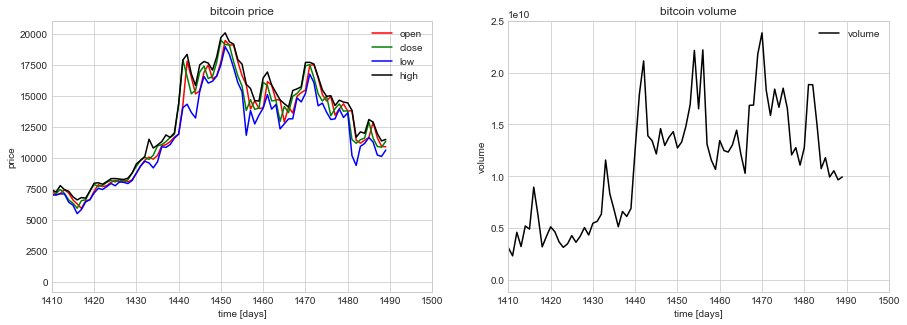

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(bitcoin_data.Open.values, color='red', label='open')
plt.plot(bitcoin_data.Close.values, color='green', label='close')
plt.plot(bitcoin_data.Low.values, color='blue', label='low')
plt.plot(bitcoin_data.High.values, color='black', label='high')
plt.title('bitcoin price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.xlim(1410, 1500)
#plt.show()

plt.subplot(1,2,2);
plt.plot(bitcoin_data.Volume.values, color='black', label='volume')
plt.title('bitcoin volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');
plt.xlim(1410, 1500)

The Volume of the day might have some effect on Close prices. Through observations, we think that when Close price is high while volume is low, the price will drop down in the near future(because no one wants to buy when at the high price), and vice versa(everyone wants to buy when they think the price is lower than expected).

In [38]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

# Data Preprocessing:
We chose 20 days windows that slipping through our data-set. And in each window, we use first 19 days as inputs and keep the last day as what we want our model to predict. For example, the first row is like: inputs: $day_0, day_1, day_2, \ldots, day_{18}$ and prediction is $day_{19}$; the second row is like: inputs: $day_1, day_2, \ldots, day_{19}$ and prediction is $day_{20}$.  And so on.  
For every $day$, we have 5 columns: Close, Open, High, Low, Volume

In [40]:
# (p - min)/(max - min)
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    return df

def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage*1.0/100*1.0*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage*1.0/100*1.0*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

bitcoin_data_copy = bitcoin_data.copy()
bitcoin_data_copy.drop(['Date','Market Cap','AveragePrice'],axis = 1,inplace = True)
cols = list(bitcoin_data_copy.columns.values)
print('bitcoin_data.columns.values = ', cols)

# normalize stock
bitcoin_data_norm = normalize_data(bitcoin_data_copy)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(bitcoin_data_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

('bitcoin_data.columns.values = ', [u'Open', u'High', u'Low', u'Close', u'Volume'])
('x_train.shape = ', (1176, 19, 5))
('y_train.shape = ', (1176, 5))
('x_valid.shape = ', (147, 19, 5))
('y_valid.shape = ', (147, 5))
('x_test.shape = ', (147, 19, 5))
('y_test.shape = ', (147, 5))


## How the network is built and how to train it:
* we implemented a Convolutional Layer to merge data from 5 channels to 4 channels
* using a LSTM with 2 layers each of which has 200 hidden features(neuros), fed with matrix: [19x4]. 50 examples per batch, so for every batch, the input is: [50x19x4]
* outputs are the same with inputs: [19x4] each data
* errors are measured with __Loss Function__: $L=\frac{1}{n}(y-\hat y)$  
  where $\hat y$ is our outputs and n is the total number in the batch.
* __Training__: backpropagation with [Adam](https://arxiv.org/pdf/1412.6980.pdf)  
  Backpropagation example: Calculating the partial derivative of the error  
  with respect to a weight w i j is done using the chain rule(twice):
  $\frac{\partial E}{\partial W_{ij}} = \frac{\partial E}{\partial  
  o_j}\frac{\partial o_j}{\partial net_j}\frac{\partial net_j}{\partial 
  w_{ij}}$

In [57]:
## Basic Cell RNN in tensorflow
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]: # if pointing to the place out ouf range, reset start and go from head again
                                          # it ensures that this function can be called forever so long
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 5 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

convX = tf.layers.conv1d(
    inputs=X,
    filters=4,
    kernel_size=3,
    strides=1,
    padding='SAME',
    activation=tf.nn.relu               
)

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
         for layer in range(n_layers)]
                          
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, convX, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence as ground truth
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch[:,:-1]}) # get rid of volume from y
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train[:,:-1]}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid[:,:-1]}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.000103/0.008571
4.00 epochs: MSE train/valid = 0.000003/0.000272
9.00 epochs: MSE train/valid = 0.000004/0.000108
14.00 epochs: MSE train/valid = 0.000002/0.000101
19.00 epochs: MSE train/valid = 0.000002/0.000130
24.00 epochs: MSE train/valid = 0.000002/0.000081
29.00 epochs: MSE train/valid = 0.000003/0.000070
34.00 epochs: MSE train/valid = 0.000002/0.000095
39.00 epochs: MSE train/valid = 0.000002/0.000058
44.00 epochs: MSE train/valid = 0.000002/0.000051
49.00 epochs: MSE train/valid = 0.000002/0.000054
54.00 epochs: MSE train/valid = 0.000001/0.000061
59.00 epochs: MSE train/valid = 0.000001/0.000043
64.00 epochs: MSE train/valid = 0.000001/0.000045
69.00 epochs: MSE train/valid = 0.000001/0.000037
74.00 epochs: MSE train/valid = 0.000001/0.000035
79.00 epochs: MSE train/valid = 0.000001/0.000035
84.00 epochs: MSE train/valid = 0.000001/0.000043
89.00 epochs: MSE train/valid = 0.000001/0.000033
94.00 epochs: MSE train/valid = 0.000001/0.000038
99.

We also did experiments and decided to include volume

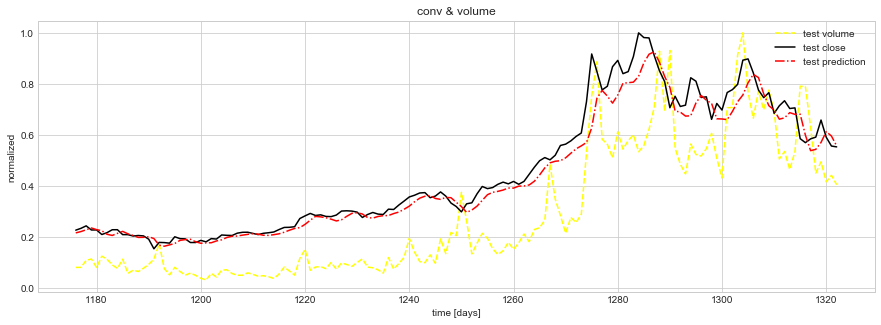

In [61]:
plt.figure(figsize=(15, 5));
ft = 3 # 0 = open, 1 = high, 2 = low, 3 = close

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,4], color='yellow',linestyle = '--', label='test volume')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,3], color='black', label='test close')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='red',linestyle = '-.', label='test prediction')
plt.title('conv & volume')
plt.xlabel('time [days]')
plt.ylabel('normalized')
plt.legend(loc='best');
# y_train_pred
# y_valid_pred 
# y_test_pred

Some observations about the plot:  
* the predicted Close is always lower than actual price. Considering they are scaled, we will built strategy based on trend.
* when the acutal price goes down, our prediction is more accurate and reflect trend in time.

In order to build strategy, we keep those in mind:
* bitcoin price goes up dramatically. Nearly doubled within 100 days, so we need to build up our position as soon as possible.
* bitcoin price will jump down someday. So we don't want to hold lots of bitcoin. And when we are sure the prices will definitely go down, we will sell bitcoins we have as much as possible to avoid furthur loses.

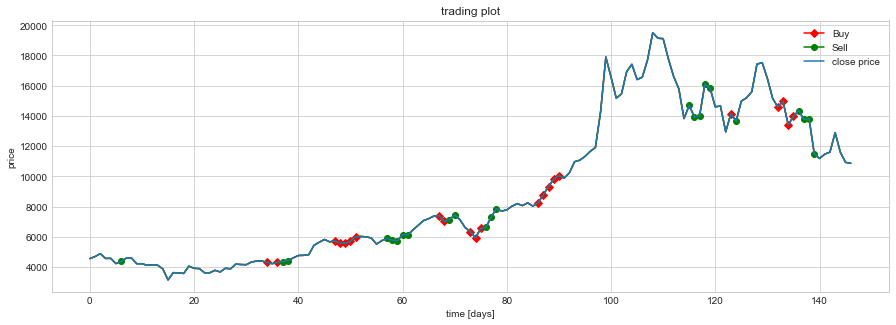

In [62]:
pred = y_test_pred[:,ft] # prediction=> [0]:Open, [1]:High, [2]:Low, [3]:Close
temp = np.zeros([pred.shape[0],1])
pred = pred.reshape(-1,1)
pred = np.append(pred, temp, 1)

# for i in xrange(1, y_test_pred.shape[0]):
#     if pred[i-1][0] < pred[i][0]:
#         pred[i][1] = 0 # buy signal
#     if pred[i-1][0] > pred[i][0]:
#         pred[i][1] = -0 # sell signal
close_t = y_test[:,3].reshape(-1,1)
close_total = np.append(pred, close_t, 1)
close_total.shape
flag1 = False
flag2 = False
k1 = 0
k2 = 5
# prediction = close_total[:,0]; acutal = close_total[:,2]
for i in xrange(1, y_test_pred.shape[0]):
    # t-1: acutal>prediction; t: actual<prediction; prediction goes up from t-1 to t
    if (close_total[i-1][2] > close_total[i-1][0]) and (close_total[i][2] < close_total[i][0]) and (close_total[i-1][0]>close_total[i][0]):
        flag1 = True # keep generating signals
        k1 = 0
    if (flag1 == True) and (close_total[i][1] == 0):
        k1 += 3 # one more day the condition holds, k1 grows by 3
        close_total[i][1] += -k1 # buy signal(not a trade)
    if (close_total[i-1][2] < close_total[i-1][0]) and (close_total[i][2] > close_total[i][0]):
        flag1 = False
    # t-1: acutal<prediction; t: actual>prediction; actual goes down from t-1 to t
    if (close_total[i-1][2] < close_total[i-1][0]) and (close_total[i][2] > close_total[i][0]) and (close_total[i-1][2]<close_total[i][2]):
        flag2 = True
        k2 = 8 # the first time come crossing, k2 = 8
    if (flag2 == True) and (close_total[i][1] == 0):
        k2 -= 1 # one more day the condition holds, k2 reduce by 1
        close_total[i][1] += k2 # sell signal(not a trade)
    if (close_total[i-1][2] > close_total[i-1][0]) and (close_total[i][2] < close_total[i][0]):
        flag2 = False
_, _, _, _, _, close_actual = load_data(bitcoin_data, seq_len)
cl = close_actual[:,4]
s_p = 0 # sum positive signals
s_n = 0 # sum negative signals
value = []
hold_max = 5 # how many bitcoins have at most
hold = 1 # initial position
trade_buy = []
trade_sell = []
for i in xrange(1, close_total.shape[0]):
    if close_total[i][1] * close_total[i-1][1] <= 0: # if the signal turns from buy/sell to sell/buy, reset s_p, s_p
        s_p = 0
        s_n = 0
    if close_total[i][1] > 0: # cumulate positive signals
        s_p += close_total[i][1]
    if close_total[i][1] < 0: # neg
        s_n += close_total[i][1]
    if (s_p/5 >= 1) & (hold >0): # if s_p exceeds 5, then sell one bitcoin and reduce s_p by 5
        s_p = s_p - 5
        value.append(cl[i])
        hold += -1
        trade_sell.append(i)
    if (s_n/(-5) >= 1) & (hold <hold_max): # if |s_n| exceeds 5, then buy one bitcoin and reduce |s_n| by 5
        s_n = s_n +5
        value.append(-cl[i])
        hold += 1
        trade_buy.append(i)
plt.figure(figsize=(15, 5))
plt.plot(cl, '-rD', markevery = trade_buy, label = 'Buy')
plt.plot(cl, '-go', markevery = trade_sell, label = 'Sell')
plt.plot(cl, label = 'close price')
plt.legend(loc='best')
plt.title('trading plot')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.show()

We sum up revenue we could earn through a period of 147 days when bitcoin price reaches its peak.

In [63]:
np.sum(value), hold

(33065.290000000008, 0)

we could earn more if larger position is permitted. Change hold_max and see for yourself!

In [ ]:
close_total[:,1] # signals

In [2]:
#Declaring imports for importing modules

import pandas as pd
import numpy as np
from pprint import pprint
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/BITCOIN.csv'

C:\Users\111\Desktop\Bitcoin


In [6]:
#Reading bitcoin history data into Dataframe
bitcoin_data = pd.read_csv(file_path, encoding='latin-1')

In [7]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-Apr-13,135.3,135.98,132.1,134.21,NaN,"1,500,520,000"
1,29-Apr-13,134.44,147.49,134,144.54,-,"1,491,160,000"
2,30-Apr-13,144,146.93,134.05,139,-,"1,597,780,000"
3,1-May-13,139,139.89,107.72,116.99,-,"1,542,820,000"
4,2-May-13,116.38,125.6,92.28,105.21,-,"1,292,190,000"


In [8]:
bitcoin_data['Open'] = [x.replace(',', '') for x in bitcoin_data['Open']]
bitcoin_data['Close'] = [x.replace(',', '') for x in bitcoin_data['Close']]
bitcoin_data['High'] = [x.replace(',', '') for x in bitcoin_data['High']]
bitcoin_data['Low'] = [x.replace(',', '') for x in bitcoin_data['Low']]
bitcoin_data['Market Cap'] = [x.replace(',', '') for x in bitcoin_data['Market Cap']]

In [9]:
# It will replace empty string values to None and Numeric to 0
bitcoin_data['Volume'] = np.where(bitcoin_data['Volume'] == '-' , '0.0', bitcoin_data['Volume'])

In [10]:
bitcoin_data['Volume'] = bitcoin_data['Volume'].astype(str)

In [11]:
bitcoin_data['Volume'] = [x.replace(',', '') for x in bitcoin_data['Volume']]

In [12]:
bitcoin_data['Open'] = bitcoin_data['Open'].astype(float)
bitcoin_data['Close'] = bitcoin_data['Close'].astype(float)
bitcoin_data['High'] = bitcoin_data['High'].astype(float)
bitcoin_data['Low'] = bitcoin_data['Low'].astype(float)
bitcoin_data['Market Cap'] = bitcoin_data['Market Cap'].astype(float)
bitcoin_data['Volume'] = bitcoin_data['Volume'].astype(float)

In [13]:
bitcoin_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-Apr-13,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,29-Apr-13,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2,30-Apr-13,144.00,146.93,134.05,139.00,0.0,1.597780e+09
3,1-May-13,139.00,139.89,107.72,116.99,0.0,1.542820e+09
4,2-May-13,116.38,125.60,92.28,105.21,0.0,1.292190e+09


In [14]:
#Checking for null values
bitcoin_data.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume         True
Market Cap    False
dtype: bool

In [15]:
bitcoin_data.describe(include='all')

,Date,Open,High,Low,Close,Volume,Market Cap
count,1846,1846.000000,1846.000000,1846.000000,1846.000000,1.844000e+03,1.846000e+03
unique,1846,NaN,NaN,NaN,NaN,NaN,NaN
top,18-Dec-16,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1822.496501,1887.821533,1749.935130,1826.541159,1.130434e+09,2.968826e+10
std,NaN,3282.678606,3422.179268,3112.533168,3285.292568,3.012736e+09,5.551511e+10
min,NaN,68.510000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08
25%,NaN,282.487500,288.337500,278.182500,283.432500,1.714452e+07,4.030322e+09
50%,NaN,536.780000,570.360000,518.180000,538.340000,4.777440e+07,7.133860e+09
75%,NaN,1035.762500,1054.640000,1001.345000,1035.542500,2.131830e+08,1.630785e+10


In [16]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.index = bitcoin_data['Date']
del bitcoin_data['Date']

In [17]:
bitcoin_data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN,1.500520e+09
2013-04-29,134.44,147.49,134.00,144.54,0.000000e+00,1.491160e+09
2013-04-30,144.00,146.93,134.05,139.00,0.000000e+00,1.597780e+09
2013-05-01,139.00,139.89,107.72,116.99,0.000000e+00,1.542820e+09
2013-05-02,116.38,125.60,92.28,105.21,0.000000e+00,1.292190e+09
2013-05-03,106.25,108.13,79.10,97.75,0.000000e+00,1.180070e+09
2013-05-04,98.10,115.00,92.50,112.50,0.000000e+00,1.089890e+09
2013-05-05,112.90,118.80,107.14,115.91,0.000000e+00,1.254760e+09
2013-05-06,115.98,124.66,106.64,112.30,0.000000e+00,1.289470e+09


In [20]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/SP500.csv'

C:\Users\111\Desktop\Bitcoin


In [21]:
SP500_data = pd.read_csv(file_path, encoding='latin-1')

In [22]:
SP500_data.head()

,observation_date,SP500
0,2008-04-30,1385.59
1,2008-05-01,1409.34
2,2008-05-02,1413.90
3,2008-05-05,1407.49
4,2008-05-06,1418.26


In [23]:
SP500_data.describe()

,SP500
count,2532.000000
mean,1663.121323
std,522.202163
min,676.530000
25%,1227.672500
50%,1604.770000
75%,2079.535000
max,2872.870000


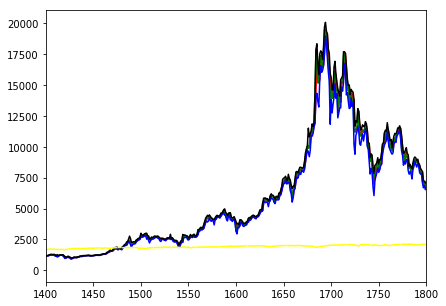

In [24]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(bitcoin_data.Open.values, color='red', label='open')
plt.plot(bitcoin_data.Close.values, color='green', label='close')
plt.plot(bitcoin_data.Low.values, color='blue', label='low')
plt.plot(bitcoin_data.High.values, color='black', label='high')
plt.plot(SP500_data.SP500.values, color='yellow', label='BP500')
plt.xlim(1400,1800)
plt.show()
#For example, consider an investor who has a diversified stock portfolio valued at $2000,000

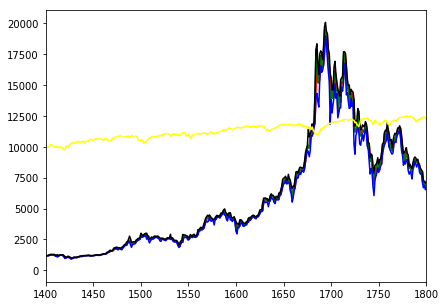

In [25]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(bitcoin_data.Open.values, color='red', label='open')
plt.plot(bitcoin_data.Close.values, color='green', label='close')
plt.plot(bitcoin_data.Low.values, color='blue', label='low')
plt.plot(bitcoin_data.High.values, color='black', label='high')
plt.plot(SP500_data.SP500.values*5.9, color='yellow', label='BP500')
plt.xlim(1400,1800)
plt.show()

Each SPX option represents $30 times the strike price. For instance, if an SPX put with a strike price of 2500 is utilized, it would represent $50000 of market value (2500 x $20). So, an investor with a stock portfolio valued at $2000,000 would purchase 5.9 SPX 2500 puts ($2000,000 / $50,000) to hedge the portfolio. 
SP index

In [26]:
##For example, consider an investor who has a diversified stock portfolio valued at $2000,000
h1=522.20/3285.28*0.928
h1

0.14750694004772805

In [27]:
Portfilio=2000000;
Bit_price=2500;
Num=20;
onc=h1*(Portfilio/(Bit_price*Num))
onc

5.900277601909122

In [30]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/result.csv'

C:\Users\111\Desktop\Bitcoin


In [31]:
#Reading bitcoin history data into Dataframe
result = pd.read_csv(file_path, encoding='latin-1')

In [32]:
result

,SP500,%Gain,Portfolio$Gain/Loss,Hedge Cost,2500 Bitcoin put value,Total,Portfolio%Gain/Loss
0,2400,-4%,-80000,10000,80000,-10000,-0.50%
1,2700,8%,160000,10000,0,150000,7.50%
2,2100,-16%,-320000,10000,320000,-10000,-0.50%


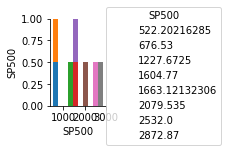

In [35]:
#Plotting pairplot
%matplotlib inline
sns.pairplot(SP500_data.describe(),hue='SP500',size=2)
#plt.savefig(cur_path+'/PairPlot.jpg',bbox_inches="tight")
plt.show()